# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

Cloning into 'damavand'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 263 (delta 132), reused 196 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (263/263), 6.62 MiB | 12.75 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
!pip install -r damavand/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successful

# Importings

In [1]:
from damavand.damavand.datasets.downloaders import read_addresses, PuDownloader
from damavand.damavand.datasets.digestors import PU
from damavand.damavand.signal_processing.transformations import *
from damavand.damavand.signal_processing.feature_extraction import *
from damavand.damavand.utils import *
import os
import pandas as pd
import numpy as np
import scipy

# Instantiating a downloader object

In [2]:
addresses = read_addresses()
addresses['PU'].pop('real_damage')
downloader = PuDownloader(addresses['PU'])
downloader.download_extract(download_path = 'PU_compressed/', extraction_path = 'PU/', timeout = 10)

Downloading:  K001.rar
Downloading:  K002.rar
Downloading:  K003.rar
Downloading:  K004.rar
Downloading:  K005.rar
Downloading:  K006.rar
Downloading:  KA01.rar
Downloading:  KA03.rar
Downloading:  KA05.rar
Downloading:  KA06.rar
Downloading:  KA07.rar
Downloading:  KA08.rar
Downloading:  KA09.rar
Downloading:  KI01.rar
Downloading:  KI03.rar
Downloading:  KI05.rar
Downloading:  KI07.rar
Downloading:  KI08.rar
Extracting:  K001.rar
Extracting:  K002.rar
Extracting:  K003.rar
Extracting:  K004.rar
Extracting:  K005.rar
Extracting:  K006.rar
Extracting:  KA01.rar
Extracting:  KA03.rar
Extracting:  KA05.rar
Extracting:  KA06.rar
Extracting:  KA07.rar
Extracting:  KA08.rar
Extracting:  KA09.rar
Extracting:  KI01.rar
Extracting:  KI03.rar
Extracting:  KI05.rar
Extracting:  KI07.rar
Extracting:  KI08.rar


# Instantiating a digestor object

In [3]:
mining_params = {'win_len': 16000, 'hop_len': 16000}

pu = PU('PU/', os.listdir('PU/'), ['Vib'],reps = [1])
pu.mine(mining_params)

# Aggregating vibration data

In [ ]:
df = pd.concat(pu.data['Vib']).reset_index(drop = True)
df

# Signals-Metadata declaration

In [5]:
signals, metadata = df.iloc[:, : -5], df.iloc[:, -5 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,0.012207,0.057983,0.085449,0.177002,0.039673,0.027466,0.030518,-0.003052,0.018311,-0.051880,...,-0.158691,-0.115967,0.009155,0.170898,0.195312,0.189209,-0.018311,-0.213623,-0.146484,-0.042725
1,-0.033569,-0.067139,-0.231934,-0.149536,-0.177002,-0.009155,0.067139,0.088501,-0.061035,-0.231934,...,-0.082397,0.500488,0.653076,0.244141,-0.363159,-0.650024,-0.491333,0.061035,0.424194,0.360107
2,-0.125122,-0.680542,-0.949097,-0.793457,-0.360107,-0.045776,-0.067139,-0.189209,-0.286865,-0.115967,...,0.692749,0.692749,0.802612,0.524902,-0.070190,-0.701904,-1.309204,-1.556396,-1.226807,-1.062012
3,-0.851440,-0.515747,-0.225830,0.033569,0.262451,0.360107,0.140381,-0.082397,-0.338745,-0.280762,...,-0.338745,-0.180054,-0.305176,0.143433,0.137329,0.787354,0.100708,0.250244,-0.082397,0.274658
4,0.030518,-0.744629,-0.073242,0.335693,-0.140381,0.885010,0.137329,1.092529,0.027466,-0.967407,...,-0.186157,-0.073242,0.045776,0.183105,0.146484,0.094604,1.336670,0.100708,0.765991,0.332642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,-0.057983,0.100708,-0.048828,0.152588,0.125122,0.064087,-0.048828,0.012207,-0.283813,-0.054932,...,0.109863,-0.207520,0.125122,0.161743,0.109863,0.210571,-0.012207,-0.146484,-0.155640,-0.234985
1148,-0.119019,0.067139,0.009155,0.180054,0.051880,0.509644,0.009155,0.106812,0.030518,0.051880,...,-0.146484,-0.079346,-0.198364,-0.137329,-0.131226,-0.054932,0.003052,0.119019,-0.054932,0.076294
1149,0.018311,0.015259,-0.036621,-0.012207,-0.027466,-0.057983,-0.027466,-0.079346,0.039673,0.006104,...,-0.085449,0.204468,-0.054932,-0.057983,-0.042725,1.083374,-0.134277,0.161743,-0.094604,-0.436401
1150,0.051880,1.135254,0.042725,-0.802612,-0.082397,-0.836182,-0.140381,-0.262451,-0.003052,0.250244,...,0.000000,-0.131226,-0.036621,-0.085449,-0.109863,-0.097656,-0.186157,-0.149536,1.480103,-0.057983


In [6]:
metadata

,rot_speed,load_torque,radial_force,code,rep
0,N15,M07,F04,KI01,1
1,N15,M07,F04,KI01,1
2,N15,M07,F04,KI01,1
3,N15,M07,F04,KI01,1
4,N15,M07,F04,KI01,1
...,...,...,...,...,...
1147,N09,M07,F10,K001,1
1148,N09,M07,F10,K001,1
1149,N09,M07,F10,K001,1
1150,N09,M07,F10,K001,1


# Signal Processing

## Envelope Extraction

In [7]:
signals_env = env(signals)
signals_env.shape

(1152, 16000)

## FFT

In [8]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 31000], 'bandpass', fs = 64000, output='sos')

In [9]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(1152, 8000)

## Zoomed FFT

In [10]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 64000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(1152, 2000)

## STFT

In [11]:
STFT_window = scipy.signal.windows.hann(2000)
STFT_freq_filter = scipy.signal.butter(25, [5, 31000], 'bandpass', fs = 64000, output='sos')
signals_env_STFT = stft(signals_env, 2000, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(1152, 71, 1000)

## Statistical Features

In [16]:
# Defining the feature-set to be extracted
features = {'mean': (np.mean, (), {}), 'var': (np.var, (), {}), 'rms': (rms, (), {})}

In [17]:
# Extracting the desired feature-set from time-domain signals
features_df = feature_extractor(signals, features)
features_df

,mean,var,rms
0,-0.014983,0.267011,0.516949
1,-0.014994,0.357743,0.598304
2,-0.015197,0.325597,0.570813
3,-0.011013,0.286674,0.535533
4,-0.011621,0.383353,0.619264
...,...,...,...
1147,-0.013029,0.120181,0.346917
1148,-0.019953,0.138645,0.372884
1149,-0.019041,0.140663,0.375533
1150,-0.014897,0.137413,0.370991


# Visualization

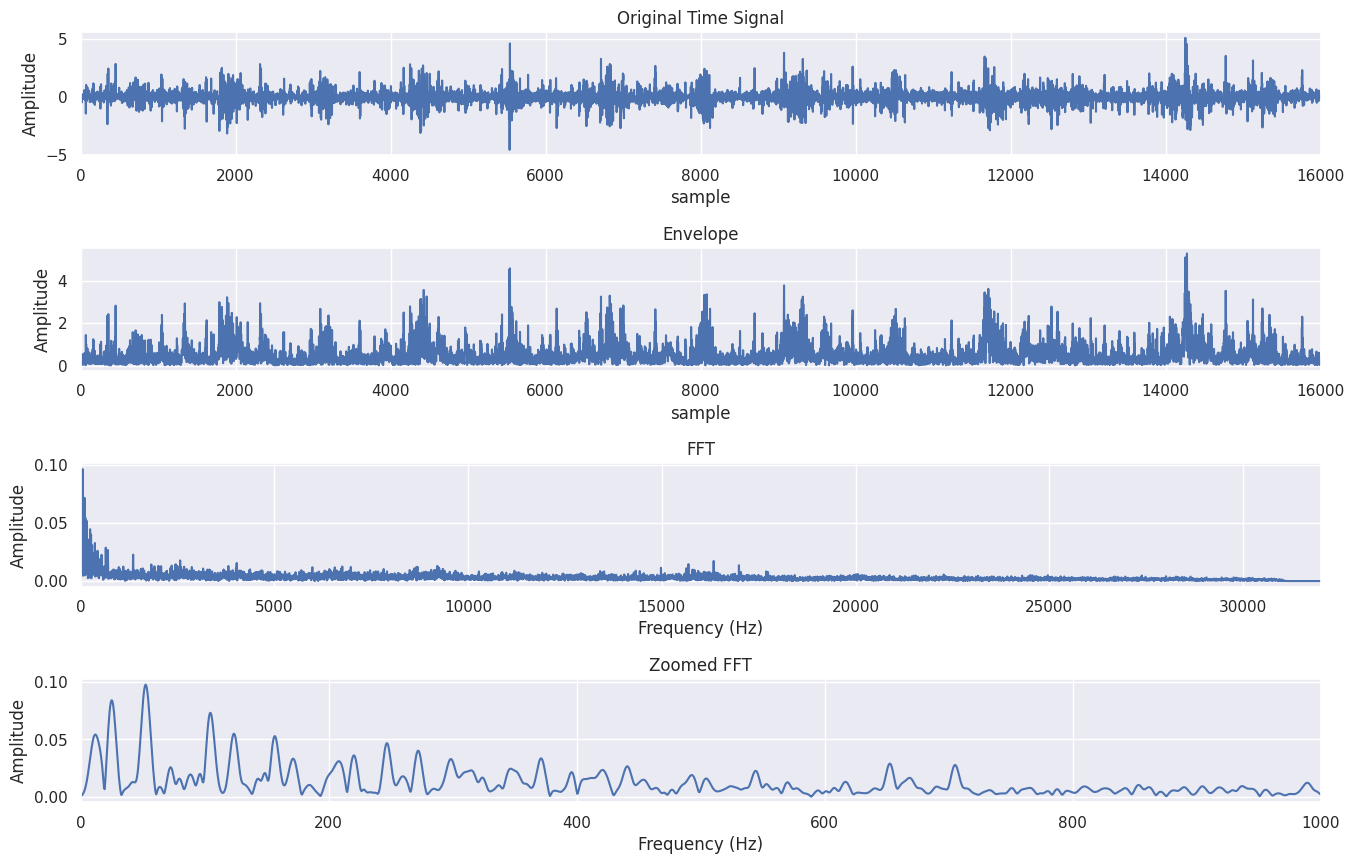

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 16000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 16000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(16000, 64000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 32000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

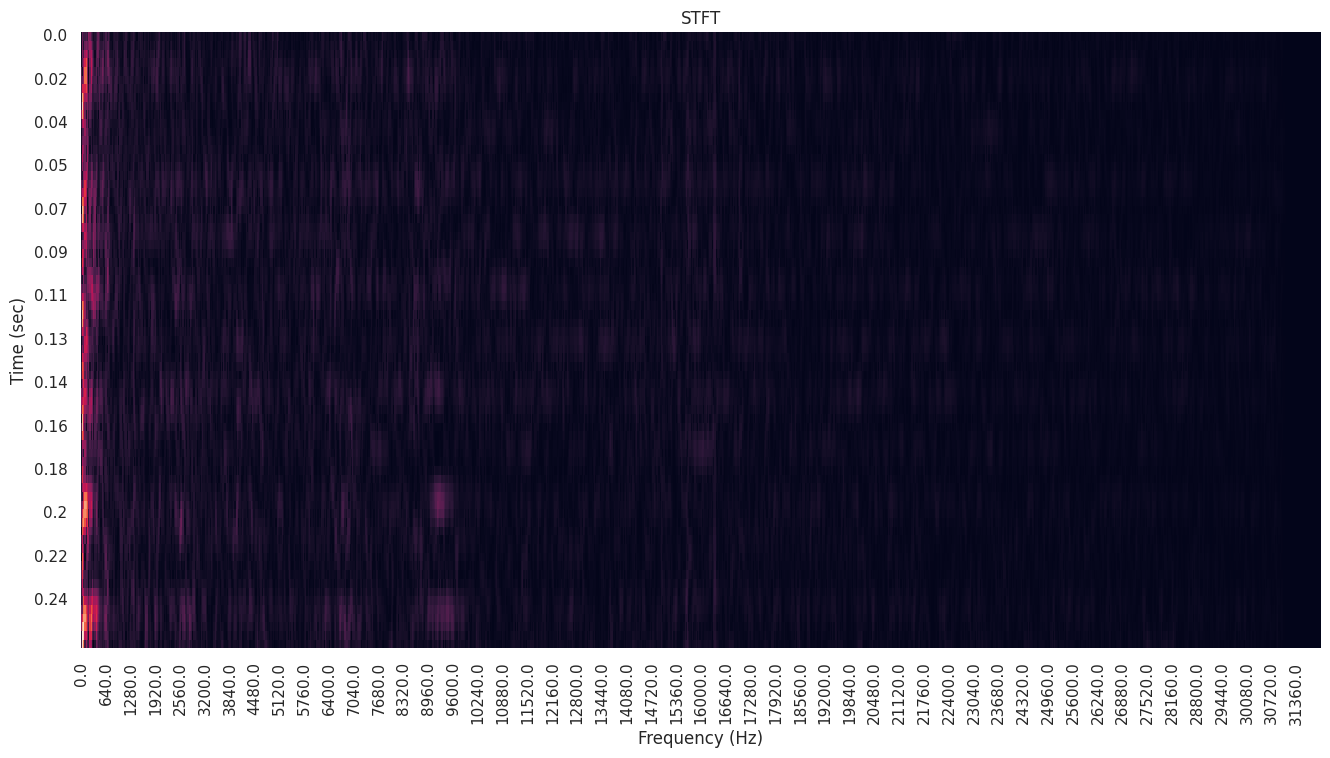

In [19]:
t = np.linspace(0, 0.25, 70)
f = fft_freq_axis(2000, 64000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()